In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
data = pd.read_csv('ex2data1.txt', sep=",", header=None,names=["Exam-1", "Exam-2","Admission Granted"])
print(data)

       Exam-1     Exam-2  Admission Granted
0   34.623660  78.024693                  0
1   30.286711  43.894998                  0
2   35.847409  72.902198                  0
3   60.182599  86.308552                  1
4   79.032736  75.344376                  1
..        ...        ...                ...
95  83.489163  48.380286                  1
96  42.261701  87.103851                  1
97  99.315009  68.775409                  1
98  55.340018  64.931938                  1
99  74.775893  89.529813                  1

[100 rows x 3 columns]


Text(0, 0.5, 'Exam 2 Score')

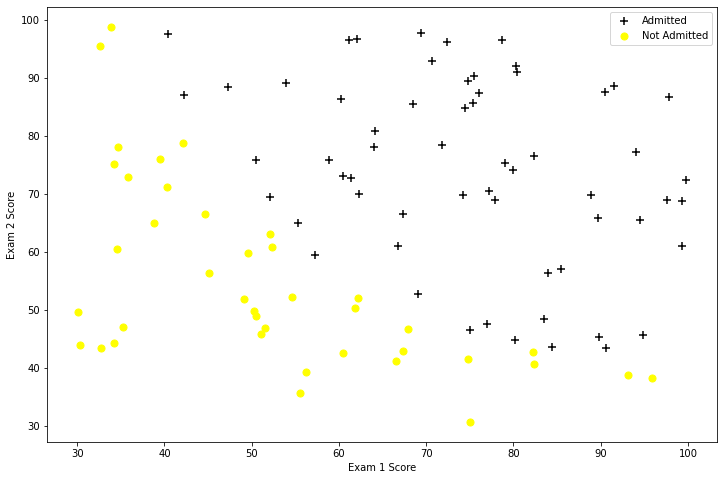

In [3]:
positiveClass = data[data['Admission Granted'].isin([1])]
negativeClass = data[data['Admission Granted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positiveClass['Exam-1'], positiveClass['Exam-2'], s=50, c='black', marker='+', label='Admitted')
ax.scatter(negativeClass['Exam-1'], negativeClass['Exam-2'], s=50, c='yellow', marker='o', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [4]:
def sigmoidFunction(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def costFunction(theta, X, Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    term1 = np.multiply(-Y , np.log(sigmoidFunction(X * theta.T)))
    term2 = np.multiply((1 - Y), np.log(1 - sigmoidFunction(X * theta.T)))
    return np.sum(term1 - term2) / (len(X))


In [6]:
data.insert(0, 'Ones', 1)

In [7]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [8]:

X = np.array(X.values)
y = np.array(y.values)
theta = np.matrix(np.array([0,0,0]))
theta

matrix([[0, 0, 0]])

In [9]:
costFunction(theta, X, y)

0.6931471805599453

In [10]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    featureCount = int(theta.ravel().shape[1])
    gradient = np.zeros(featureCount)
    
    error = sigmoidFunction(X * theta.T) - y
    
    for i in range(featureCount):
        term = np.multiply(error, X[:,i]) #error * FeatureValue or (h0 - y)x
        gradient[i] = np.sum(term) / len(X) # sum of terms/ size of X
    
    return gradient

In [11]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [12]:
result = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [13]:
updated_theta= result[0]
print(updated_theta)

[-25.16131872   0.20623159   0.20147149]


In [14]:
costFunction(updated_theta, X, y)

0.20349770158947425

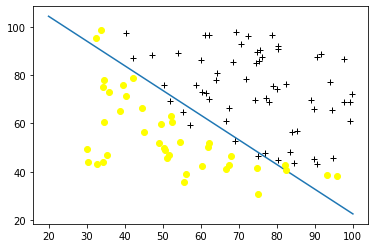

In [15]:

x_val = np.array([20,100])# range for points 
y_val= (-1/updated_theta[2]) * (updated_theta[1] * x_val + updated_theta[0]) #theta0 +theta1*x1 +theta2*x2=0 then make x2 subject
plt.plot(x_val, y_val, label = "Decision_Boundary")
plt.plot(positiveClass['Exam-1'], positiveClass['Exam-2'],'+', color='black', label='Admitted')
plt.plot(negativeClass['Exam-1'], negativeClass['Exam-2'],'o', color='yellow', marker='o', label='Not Admitted')


In [16]:
Optimized_theta =np.matrix(updated_theta)
prob = sigmoidFunction(np.array([1,45,85]) * Optimized_theta.T)
print("Probability of Student with score 45,85 to get admission:")
print(prob)

Probability of Student with score 45,85 to get admission:
[[0.77629063]]
